# Tratamento de dados com pandas :🐼
Utilizando a base de dados de ações da bolsa de valores dos EUA, a Dow Jones.



In [1]:
!pip install wget==3.2 #instalando pacote wget que servirar para fazer dowload de um database na web

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=d2a8f8ddc99153f0b8a21ba009c5063b51220252721991e5f631a8d4efb21b93
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget #importando o pacote que instalamos anteriormente
wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip') #fazendo fowload do arquivo compactado

'./dados.zip'

Neste momento já temos nosso arquivo compactado de baze de dados no nosso notbook

Agora vamos descompactalo com o pacote "zipfile"

In [3]:
import zipfile
with zipfile.ZipFile('./dados.zip', 'r') as fp: #lendo o arquivo compactado
  fp.extractall('./dados') #extraindo conteudo da pasta compactada

Agora podemos observar que na pasta dados temos dois arquivos "dow_jones_index.data" e "dow_jones_index.names"

vamos converter o arquivo .data para .csv atraves do pacote "os" para podermos transforma-lo em uma tabela

In [4]:
import os
os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv') #renomeando arquivo

Agora vamos instalar o pacote pandas

In [9]:
!pip install pandas==1.5.3 #você pode escolher a versão que perferir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [14]:
import pandas as pd

df = pd.read_csv('./dados/dow_jones_index.csv') #transformando o arquivo em um data frame com o pandas

In [ ]:
df.head(10) #as 10 primeiras linhas do data frame

In [17]:
df.columns.tolist() #nome das colunas

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [21]:
print(df.shape) # numero de linhas e colunas do data frame
linhas, colunas = df.shape #quandando numero de linhas e colunas em variaveis
print(f'numero de linhas {linhas} numero de colunas {colunas}')

(750, 16)
numero de linhas 750 numero de colunas 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

In [36]:
df_mcd = df[df['stock']=='MCD'] # utilizamos o df para procuras na colunas stock todas as linhas correspondentas a MCD
df_mcd

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
216,1,MCD,1/7/2011,$77.10,$77.59,$73.59,$74.37,85400677,-3.540860,NaN,NaN,$74.25,$74.06,-0.255892,49,0.820223
217,1,MCD,1/14/2011,$74.25,$74.49,$72.46,$74.06,44895850,-0.255892,-47.429164,85400677.0,$74.65,$75.01,0.482251,42,0.823656
218,1,MCD,1/21/2011,$74.65,$75.75,$74.31,$75.01,40056497,0.482251,-10.779065,44895850.0,$74.25,$73.28,-1.306400,35,0.813225
219,1,MCD,1/28/2011,$74.25,$75.85,$73.05,$73.28,46734907,-1.306400,16.672476,40056497.0,$73.80,$74.05,0.338753,28,0.832424
220,1,MCD,2/4/2011,$73.80,$74.50,$73.08,$74.05,41519549,0.338753,-11.159449,46734907.0,$74.13,$76.14,2.711450,21,0.823768
221,1,MCD,2/11/2011,$74.13,$76.32,$73.30,$76.14,39363816,2.711450,-5.192092,41519549.0,$76.07,$76.13,0.078875,14,0.801156
222,1,MCD,2/18/2011,$76.07,$76.45,$75.70,$76.13,16734140,0.078875,-57.488522,39363816.0,$75.95,$74.44,-1.988150,7,0.801261
223,1,MCD,2/25/2011,$75.95,$76.45,$74.42,$74.44,27881213,-1.988150,66.612763,16734140.0,$74.51,$76.03,2.039990,0,0.819452
224,1,MCD,3/4/2011,$74.51,$76.63,$73.64,$76.03,41047787,2.039990,47.223821,27881213.0,$76.38,$76.73,0.458235,84,0.802315
225,1,MCD,3/11/2011,$76.38,$77.25,$74.97,$76.73,34855064,0.458235,-15.086618,41047787.0,$76.10,$72.99,-4.086730,77,0.794995


In [38]:
# Vamos selecionar apenas as colunas de data e valores de ações:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]
df_mcd

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


Podemos observar que os tipos de dados são strings ou 'object' para o pandas vamos transforma-los em float e retirar o '$'

In [44]:

df_mcd.dtypes # podemos ver aqui o tipo dos dados de cada coluna

date     object
open     object
high     object
low      object
close    object
dtype: object

In [45]:
for col in ['open','high','low','close']:
  df_mcd[col] = df_mcd[col].apply(lambda value:float(value.split(sep='$')[-1])) # selecionamos nosso data frame de acordo com o indice recebendo ele mesmo com uma aolicação de função lambda, onde esta pegando o item do indice transformando ele em 'float' separando ele entre o caracter '$' e pegando o ultimo elemento[-1] o adicionando

In [48]:
df_mcd.dtypes #podemos visualizar que os typos das colunas foram auterados e que o '$' já não existe

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

In [49]:
df_mcd.head(10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


# Visualizando o dados com o seaborn📊

In [50]:
!pip install seaborn==0.13.2 #instalando o seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [51]:
import seaborn as sn

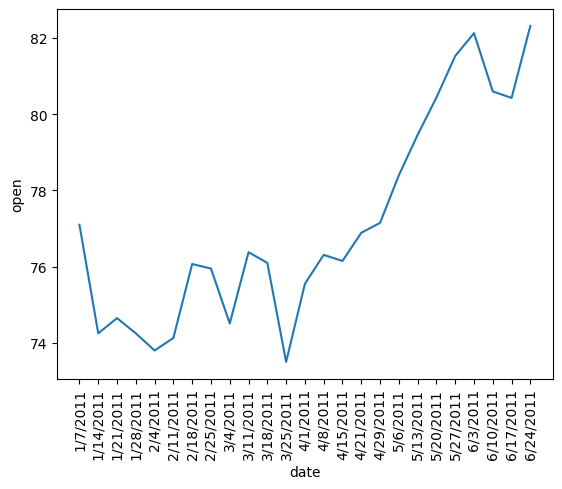

In [60]:
plot = sns.lineplot(x="date", y="open", data=df_mcd) # quarda dentro de plot um line plot onde o eixo x = dade e o y = open e referencia a base de dados como data=
plot.tick_params(axis='x', labelrotation = 90)

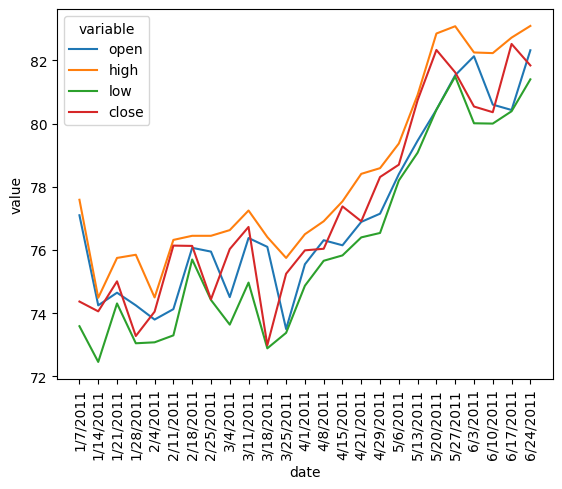

In [62]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date'])) # esse fixa a coluna data e transforma todas as outras em duas variabeis valor= que quarda o valor das colunas e hue que vai diferenciar as colunas no grafico criando uma cor pra cada
plot.tick_params(axis='x', labelrotation =90) #coloca a data em um angulo de 90 graus no grafico

In [63]:
plot.figure.savefig("./mcd.png") #salva imagem do grafico